標題：「非常寒冷」寒流襲台急凍3天這兩天最冷| 生活新聞| 生活| 聯合新聞網udn.com › 生活
網址：/url?q=https://udn.com/news/story/7266/4348864&sa=U&ved=2ahUKEwjDpu6ru-jsAhVLxIsBHc2FA3UQFnoECAkQBA&usg=AOvVaw2wJ0EEQlo0xxirgO3NJD4_
標題：天氣即時預報- 本次寒流最冷期間，即將到來--... | Facebookwww.facebook.com › weather.taiwan › posts
網址：/url?q=https://www.facebook.com/weather.taiwan/posts/1614991528556599&sa=U&ved=2ahUKEwjDpu6ru-jsAhVLxIsBHc2FA3UQFjADegQIBxAB&usg=AOvVaw3-jSvMB5jG2hDMfVmVvCfR
標題：寒流web2.nmns.edu.tw › PubLib › NewsLetter
網址：/url?q=http://web2.nmns.edu.tw/PubLib/NewsLetter/90/160/16.htm&sa=U&ved=2ahUKEwjDpu6ru-jsAhVLxIsBHc2FA3UQFjARegQICBAB&usg=AOvVaw2Cz4Geoeq5LoBAi5gJZggK
標題：寒潮- 维基百科，自由的百科全书zh.wikipedia.org › zh-tw › 寒潮
網址：/url?q=https://zh.wikipedia.org/zh-tw/%25E5%25AF%2592%25E6%25BD%25AE&sa=U&ved=2ahUKEwjDpu6ru-jsAhVLxIsBHc2FA3UQFjAWegQICxAB&usg=AOvVaw3SOL9iJB_R1oQpHsyoxA19
標題：首波寒流來襲國民健康署提醒 - 衛生福利部國民健康署www.hpa.gov.tw › Pages › Detail
網址：/url?q=https://www.hpa.gov.tw/Pages/Detail.aspx%3Fnodeid%3D1405%26pid%3D8109&sa=U&ved=2ahUKEwjDpu6

Building prefix dict from C:\Users\user\Desktop\ADT107140_AI\2020.11.04\Crawler\dictionary\dict.txt.big.txt ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.ufdf9010be0400ac6f9f421bce39db3a0.cache


text


Loading model cost 0.993 seconds.
Prefix dict has been built successfully.


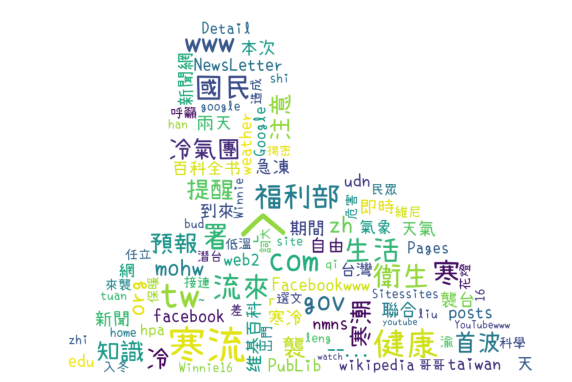

In [1]:
# NewsCloud3   文字雲結合google search

import requests
from bs4 import BeautifulSoup

# Google 搜尋 URL
google_url = 'https://www.google.com.tw/search'

# 查詢參數
my_params = {'q': '寒流'}

# 下載 Google 搜尋結果
r = requests.get(google_url, params = my_params)

# 確認是否下載成功
if r.status_code == requests.codes.ok:
  # 以 BeautifulSoup 解析 HTML 原始碼
  soup = BeautifulSoup(r.text, 'html.parser')

  # 觀察 HTML 原始碼
  #print(soup.prettify())

  # 以 CSS 的選擇器來抓取 Google 的搜尋結果
  items = soup.select('div.kCrYT > a[href^="/url"]')
 
  for i in items:
    # 標題
    print("標題：" + i.text)
    # 網址
    print("網址：" + i.get('href'))


from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import numpy as np
from collections import Counter

#讀取文字檔資料
#text = open('news1.txt', "r",encoding="utf-8").read()  #讀文字資料

#讀取Google資料

text = ''
for i in items:
    # 標題
    text = text + i.text
print("text")

jieba.set_dictionary('Crawler/dictionary/dict.txt.big.txt')
with open('Crawler/dictionary/stopWord_cloud.txt', 'r', encoding='utf-8-sig') as f:  #設定停用詞
#with open('dictionary/stopWord_cloudmod.txt', 'r', encoding='utf-8-sig') as f:  #設定停用詞
    stops = f.read().split('\n')   
terms = []  #儲存字詞
for t in jieba.cut(text, cut_all=False):  #拆解句子為字詞
    if t not in stops:  #不是停用詞
        terms.append(t)
diction = Counter(terms)
# 可列印詞的統計數量
#print(diction)

#font = "C:\\Windows\\Fonts\\simsun.ttc"  #設定字型(宋體)
font = "setofont/setofont.ttf"  #設定字型(宋體)
#wordcloud = WordCloud(font_path="C:\\Windows\\Fonts\\simsun.ttc")

mask = np.array(Image.open("test.png"))  #設定文字雲形狀 
#wordcloud = WordCloud(font_path=font) 
wordcloud = WordCloud(background_color="white",mask=mask, font_path=font)  #背景顏色預設黑色,改為白色,字體為宋體
wordcloud.generate_from_frequencies(diction)  #產生文字雲

#產生圖片
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file("news_Wordcloud.png")  #存檔